# MOVIE GENRE CLASSIFICATION USING SUPPORT VECTOR MACHINES

In [1]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
# Read files using pandas 

train_data = pd.read_csv("train_data.txt", delimiter=':::' ,header = None ,engine='python')
test_data  = pd.read_csv("test_data.txt", delimiter=':::' ,header = None ,engine='python')
test_data_solution  = pd.read_csv("test_data_solution.txt", delimiter=':::' ,header = None ,engine='python')

In [3]:
# train data 
print(train_data.shape)
train_data.head()

(54214, 4)


,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
#the test solution data 
print(test_data_solution.shape)
test_data_solution.head()

(54200, 4)


,0,1,2,3
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [5]:
#concat the test and train file

df = pd.concat((train_data ,test_data_solution))
df.columns = ["id" ,"Title","Genre","Description"]
df.head()

,id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
## Check the size 
df.shape

(108414, 4)

# Data Cleaning and Preprocessing
    

In [7]:
## Check for Duplicates and Remove them
df.duplicated().sum() ## Will give us a number of duplicates

df.drop_duplicates(inplace = True)  ## Will drops any duplicates

In [8]:
## Check for nan values

df.isna().sum()  # Will check for any duplicates

df.dropna( inplace = True ) ## Will drop any nan containing row if exists 

In [9]:
## Check the size 
df.shape

(108414, 4)

In [10]:
import string
import nltk

# Initialize the stemmer and stop words
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

In [11]:
## Create list of words in discription column
df["Despcription_clean"] =  df["Description"].apply(clean_text)

In [12]:
df.head()

,id,Title,Genre,Description,Despcription_clean
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers recovered bodies ground zer...


In [13]:
## Shows us the label counts
df["Genre"].value_counts()

Genre
 drama           27225
 documentary     26192
 comedy          14893
 short           10145
 horror           4408
 thriller         3181
 action           2629
 western          2064
 reality-tv       1767
 family           1567
 adventure        1550
 music            1462
 romance          1344
 sci-fi           1293
 adult            1180
 crime            1010
 animation         996
 sport             863
 talk-show         782
 fantasy           645
 mystery           637
 musical           553
 biography         529
 history           486
 game-show         387
 news              362
 war               264
Name: count, dtype: int64

In [14]:
## remove id column from head 
df = df.drop(["Title","id"] , axis = 1) # will drop column 
df.head()

,Genre,Description,Despcription_clean
0,drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,drama,The film's title refers not only to the un-re...,films title refers recovered bodies ground zer...


# Feature Engineering


#### Converting Genre into Numerical form

In [15]:
#Convert sentiment labels to numerical values for modeling
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Genre_encoded'] = label_encoder.fit_transform(df['Genre'])
df['Genre_encoded']

class_names= list(label_encoder.classes_)
class_names   

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [16]:
df.head()

,Genre,Description,Despcription_clean,Genre_encoded
0,drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...,8
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,24
2,adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,1
3,drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,8
4,drama,The film's title refers not only to the un-re...,films title refers recovered bodies ground zer...,8


In [17]:
from sklearn.model_selection import train_test_split
# Split the data to test and train

In [18]:
x = df["Despcription_clean"]
y = df["Genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.5)

# Model Selection & Training

In [19]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

#### Using CountVectorizer technique

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  vectorize.transform(x_test)

### Support Vector Machine with CountVectorizer 

In [21]:

svm = LinearSVC()
svm.fit(x_train1 ,y_train)
print("Model Score on Training data",svm.score(x_train1 ,y_train))
print("Model Score on Testing data",svm.score(x_test1 ,y_test))

y_pred = svm.predict(x_test1)
print(classification_report(y_pred ,y_test))

cm = confusion_matrix(y_test, y_pred)

C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Score on Training data 0.9994834615455569
Model Score on Testing data 0.5111516962753888
               precision    recall  f1-score   support

      action        0.29      0.31      0.30      1213
       adult        0.37      0.49      0.42       463
   adventure        0.22      0.33      0.26       514
   animation        0.14      0.21      0.17       326
   biography        0.02      0.04      0.03       137
      comedy        0.51      0.48      0.49      7835
       crime        0.11      0.16      0.13       353
 documentary        0.71      0.69      0.70     13613
       drama        0.59      0.54      0.56     15017
      family        0.15      0.22      0.18       540
     fantasy        0.11      0.16      0.13       211
   game-show        0.60      0.72      0.66       166
     history        0.02      0.06      0.03       101
      horror        0.57      0.54      0.55      2281
       music        0.49      0.56      0.53       663
     musical        0.08

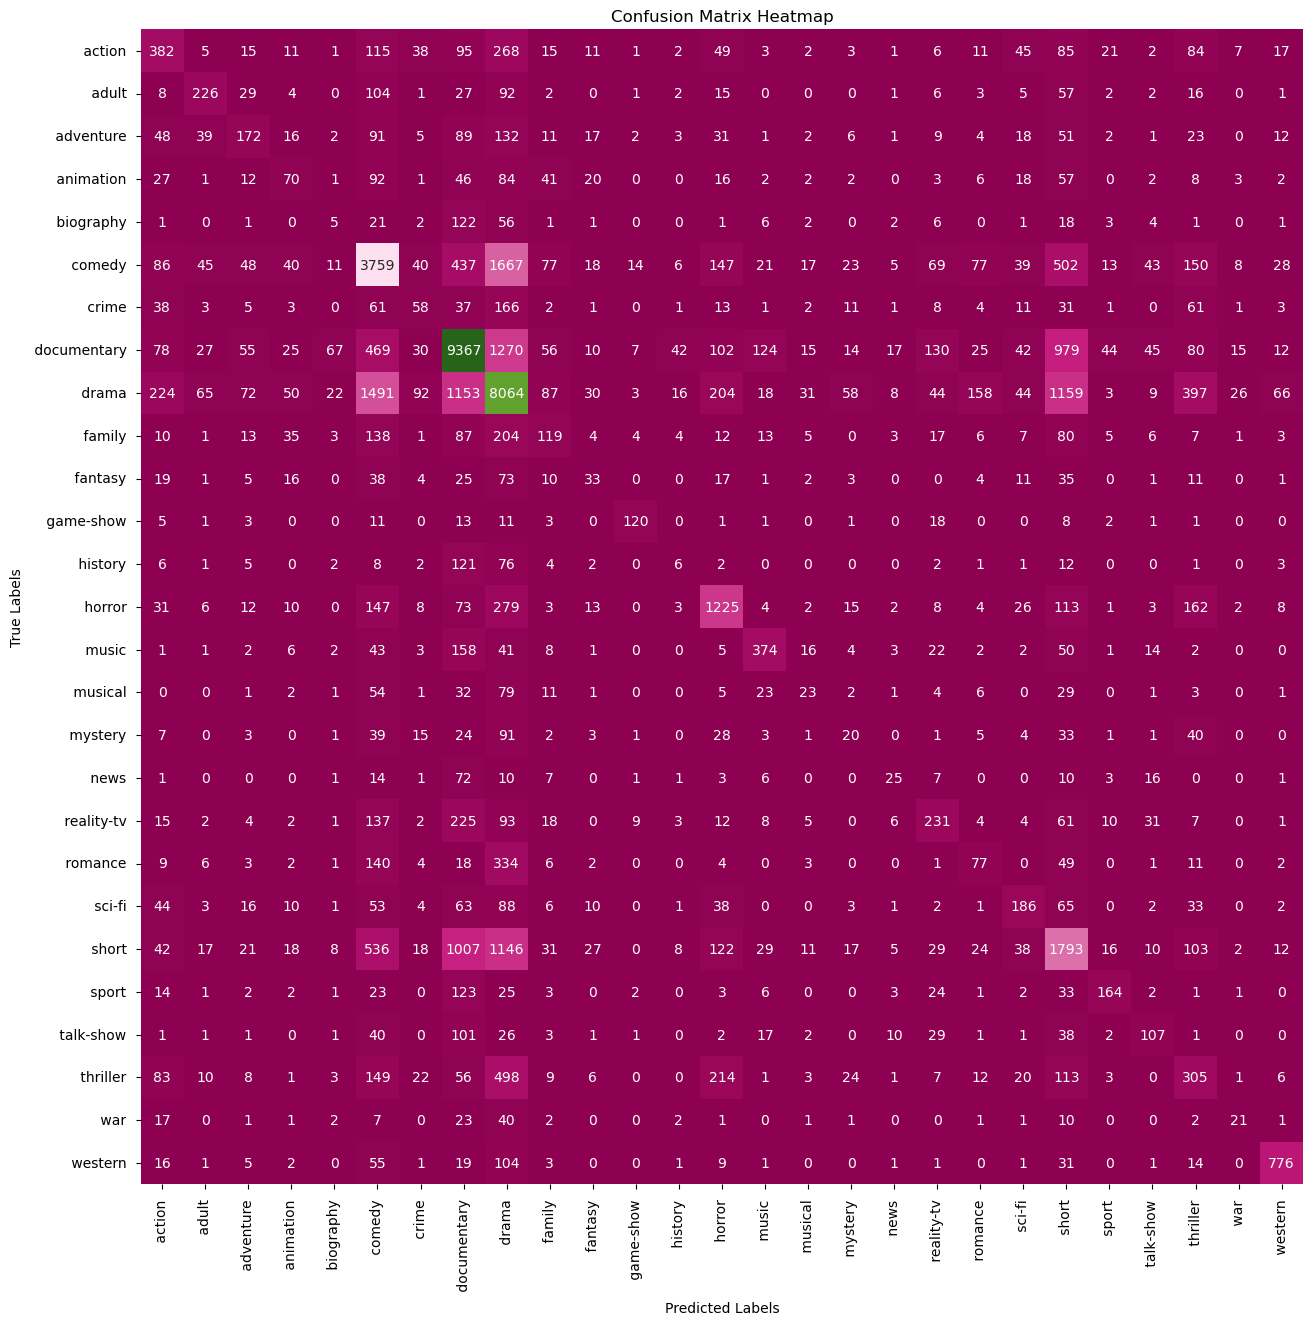

In [22]:

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, cmap = 'PiYG', annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

#### Using TfidfVectorizer technique

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Using TfidfVectorizer technique
vectorizer = TfidfVectorizer()
x_train2 = vectorizer.fit_transform(x_train)
x_test2 =  vectorizer.transform(x_test)

### Support Vector Machine with TfidfVectorizer

In [24]:
## Select SVC model

svm = LinearSVC()
svm.fit(x_train2 ,y_train)
print("Model Score on Training data",svm.score(x_train2 ,y_train))
print("Model Score on Training data",svm.score(x_test2 ,y_test))

y_pred = svm.predict(x_test2)
print(classification_report(y_pred ,y_test))

cm = confusion_matrix(y_test, y_pred)

C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model Score on Training data 0.975132362978951
Model Score on Training data 0.5867138930396443
               precision    recall  f1-score   support

      action        0.34      0.43      0.38      1024
       adult        0.40      0.67      0.50       365
   adventure        0.23      0.55      0.32       323
   animation        0.13      0.45      0.21       154
   biography        0.00      0.17      0.01         6
      comedy        0.59      0.54      0.57      8131
       crime        0.07      0.33      0.12       112
 documentary        0.82      0.69      0.75     15595
       drama        0.72      0.57      0.63     17250
      family        0.15      0.39      0.21       294
     fantasy        0.10      0.34      0.15        89
   game-show        0.66      0.80      0.72       164
     history        0.01      0.12      0.01        16
      horror        0.65      0.62      0.64      2259
       music        0.54      0.65      0.59       633
     musical        0.07

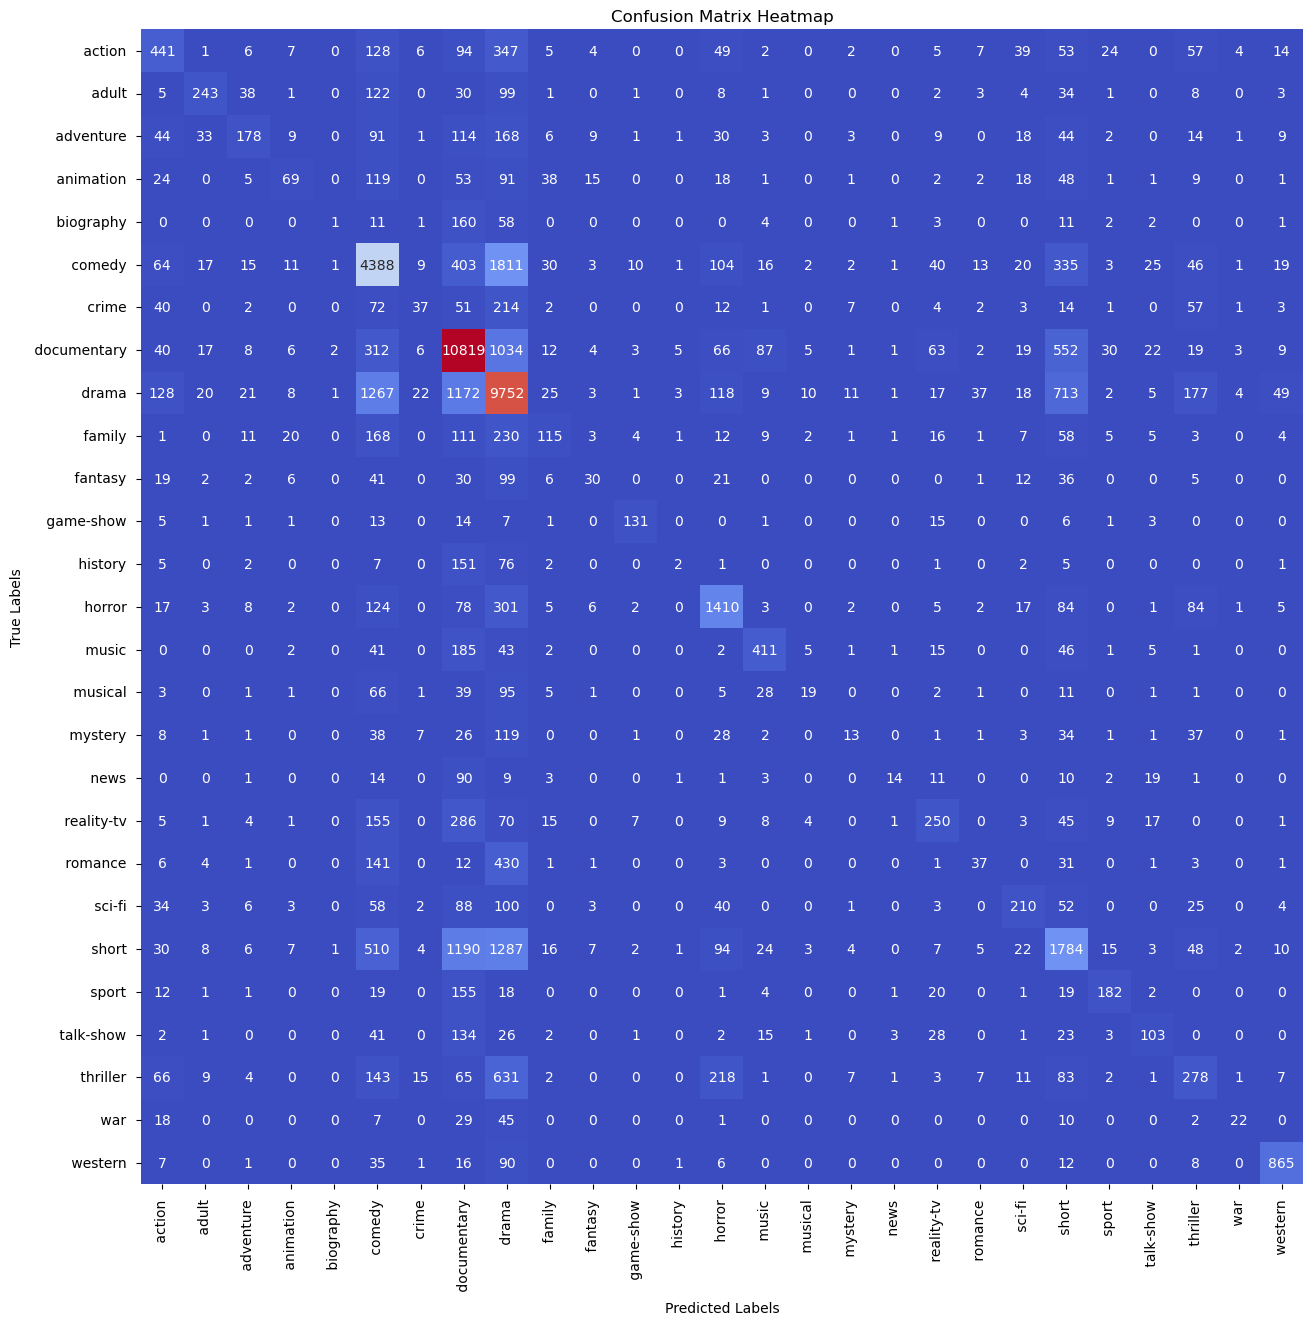

In [31]:
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm,cmap = "coolwarm", annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()